# Depedency


In [1]:
!pip install -q kaggle
!pip install torchsampler
!pip install scikit-learn
!pip install seaborn
!pip install efficientnet_pytorch
!pip install opendatasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 97.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

# Download and Unzip Dataset


In [2]:
!ls

sample_data


In [3]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/alessiocorrado99/animals10")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: illyawass
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/alessiocorrado99/animals10


In [ ]:
!unzip animals10.zip

Показано результат, скорочений до останніх рядків (5000).
  inflating: animals10/ragno/OIP-eBblY9bQyUrRADbLuh7pMQHaE8.jpeg  
  inflating: animals10/ragno/OIP-Ebel8CWMjbPSxpiQs-hAKwHaFi.jpeg  
  inflating: animals10/ragno/OIP-EbErR8KNlYyBM9jlNrIGIAHaGK.jpeg  
  inflating: animals10/ragno/OIP-eBN9F0r9OL4COmgyEYGvaAEVEs.jpeg  
  inflating: animals10/ragno/OIP-EbpsFIp42kQg7B467MR5bQHaE7.jpeg  
  inflating: animals10/ragno/OIP-ecbjPxEXH_UreyOy1xjZlQHaFH.jpeg  
  inflating: animals10/ragno/OIP-EcBwehwooCBORsmW1hDq6gHaGm.jpeg  
  inflating: animals10/ragno/OIP-ECg-But0WowvNZcIb8QIeAHaEo.jpeg  
  inflating: animals10/ragno/OIP-EcIZuLV7tnHDYHDPO0wVdAHaE7.jpeg  
  inflating: animals10/ragno/OIP-ECk9akfPinT4wzOOcsYOqgHaE7.jpeg  
  inflating: animals10/ragno/OIP-EckToZ388WVMmxwQ8UlndgHaEK.jpeg  
  inflating: animals10/ragno/OIP-ecrlgjnUaHSlYUtyPmN5wwHaFS.jpeg  
  inflating: animals10/ragno/OIP-EcxdFy8-9UBZGwjSnNtTKAHaE8.jpeg  
  inflating: animals10/ragno/OIP-eD2xyPHtfhO7QtWTKRN1xwHaFk.jpeg  
  in

In [ ]:
!ls animals10/raw-img

cane  cavallo  elefante  farfalla  gallina  gatto  mucca  pecora  ragno  scoiattolo


In [ ]:
import shutil
shutil.rmtree('animals10')

# Explore Dataset ones more


In [4]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset, random_split

# Agumentation
data_transforms = transforms.Compose([
  transforms.RandomResizedCrop((150, 150)),
  transforms.RandomHorizontalFlip(),
  transforms.ToTensor(),
])

data_dir = 'animals10/raw-img'
img_datasets = datasets.ImageFolder(data_dir, data_transforms)
class_names = img_datasets.classes
dataset_sizes = len(img_datasets)
print(dataset_sizes)

26179


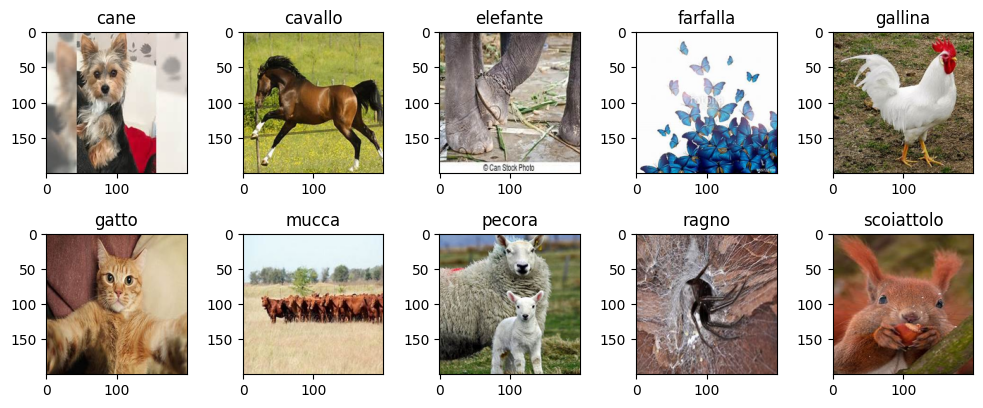

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def show_sample_images(img_datasets):
  data_loader = DataLoader(img_datasets, batch_size=4)
  dataset = data_loader.dataset
  class_names = dataset.classes
  classes_index = dataset.class_to_idx.values()

  sample_images = []

  for class_idx in classes_index:
      for img in dataset.imgs:
          if img[1] == class_idx:
              sample_images.append(img)
              break

  fig= plt.figure(figsize=(10, 10))
  rows = int(len(sample_images) // 2)
  cols = 5

  for i, (img_path, label) in enumerate(sample_images):
      image = Image.open(img_path)
      image = image.resize((200, 200))
      image = np.asarray(image)
      fig.add_subplot(rows, cols, i+1)
      plt.imshow(image)
      plt.title(class_names[label])
      plt.tight_layout()

  plt.show()

show_sample_images(img_datasets)

In [6]:
print(f"Total samples: {dataset_sizes}")
print(f"Classes: {class_names}")
print(f"Class Numbers: {len(class_names)}")

Total samples: 26179
Classes: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
Class Numbers: 10


In [7]:
def count_class_samples(dataset):
  class_names = dataset.classes
  class_counts = {}
  for _, label in dataset:
      class_name = class_names[label]
      if class_name not in class_counts:
          class_counts[class_name] = 0
      class_counts[class_name] += 1
  return class_counts

class_samples = count_class_samples(img_datasets)

print("[Dataset Samples]")
for class_name, count in class_samples.items():
  print(f"Class '{class_name}': {count} samples")

[Dataset Samples]
Class 'cane': 4863 samples
Class 'cavallo': 2623 samples
Class 'elefante': 1446 samples
Class 'farfalla': 2112 samples
Class 'gallina': 3098 samples
Class 'gatto': 1668 samples
Class 'mucca': 1866 samples
Class 'pecora': 1820 samples
Class 'ragno': 4821 samples
Class 'scoiattolo': 1862 samples


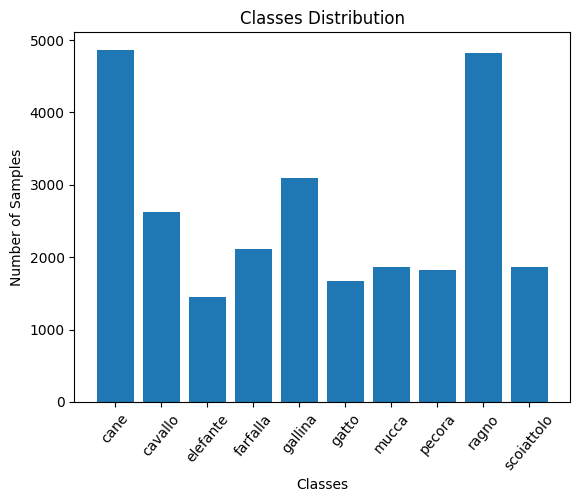

In [8]:
plt.bar(class_samples.keys(), class_samples.values())
plt.xticks(rotation=50)
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Classes Distribution')
plt.show()

# Spliting Dataset

Here we will split the dataset with certain percentages :

*   Train : 80%
*   Validation : 15%
*   Test : 5%



In [9]:
from torch.utils.data import random_split

train_size = 0.8
val_size = 0.15
test_size = 0.05

train_dataset, val_dataset, test_dataset = random_split(img_datasets, [train_size, val_size, test_size])

In [10]:
from collections import defaultdict

def count_splitted_class_samples(dataset):
  original_dataset = dataset.dataset
  class_counts = defaultdict(int)

  for index in dataset.indices:
      _, target = original_dataset[index]
      class_counts[original_dataset.classes[target]] += 1

  return class_counts

def print_splitted_class_samples(class_counts):
  for class_name, count in class_counts.items():
      print(f"Class '{class_name}': {count} samples")

  sum_data = sum([count for class_name, count in class_counts.items()])
  print(f"Total Count : {sum_data}")

train_class_samples = count_splitted_class_samples(train_dataset)
val_class_samples = count_splitted_class_samples(val_dataset)
test_class_samples = count_splitted_class_samples(test_dataset)

print("[Train Samples]")
print_splitted_class_samples(train_class_samples)
print("\n[Validation Samples]")
print_splitted_class_samples(val_class_samples)
print("\n[Test Samples]")
print_splitted_class_samples(test_class_samples)

[Train Samples]
Class 'cavallo': 2091 samples
Class 'cane': 3891 samples
Class 'mucca': 1505 samples
Class 'gallina': 2467 samples
Class 'farfalla': 1677 samples
Class 'gatto': 1320 samples
Class 'elefante': 1152 samples
Class 'ragno': 3910 samples
Class 'pecora': 1440 samples
Class 'scoiattolo': 1491 samples
Total Count : 20944

[Validation Samples]
Class 'elefante': 222 samples
Class 'ragno': 674 samples
Class 'gallina': 465 samples
Class 'scoiattolo': 284 samples
Class 'cane': 733 samples
Class 'pecora': 297 samples
Class 'mucca': 265 samples
Class 'cavallo': 398 samples
Class 'gatto': 258 samples
Class 'farfalla': 331 samples
Total Count : 3927

[Test Samples]
Class 'ragno': 237 samples
Class 'elefante': 72 samples
Class 'gallina': 166 samples
Class 'farfalla': 104 samples
Class 'gatto': 90 samples
Class 'cavallo': 134 samples
Class 'cane': 239 samples
Class 'pecora': 83 samples
Class 'mucca': 96 samples
Class 'scoiattolo': 87 samples
Total Count : 1308


# Balancing data


In [11]:
from torch.utils.data import Sampler
import torch
import numpy as np
import random

class ImbalancedDatasetSampler(Sampler):
    """Заміна для torchsampler.ImbalancedDatasetSampler."""

    def __init__(self, dataset, indices=None, num_samples=None, labels=None):
        self.indices = list(range(len(dataset))) if indices is None else indices

        self.labels = labels if labels is not None else self._get_labels(dataset)

        label_to_count = {}
        for idx in self.indices:
            label = self.labels[idx]
            if label in label_to_count:
                label_to_count[label] += 1
            else:
                label_to_count[label] = 1

        weights = []
        for idx in self.indices:
            label = self.labels[idx]
            weights.append(1.0 / label_to_count[label])

        self.weights = torch.DoubleTensor(weights)
        self.num_samples = len(self.indices) if num_samples is None else num_samples

    def _get_labels(self, dataset):
        """Витягує мітки з датасету різними способами."""
        if hasattr(dataset, "targets"):
            return dataset.targets
        elif hasattr(dataset, "labels"):
            return dataset.labels
        else:
            return [0 for _ in range(len(dataset))]

    def __iter__(self):
        return (self.indices[i] for i in torch.multinomial(
            self.weights, self.num_samples, replacement=True))

    def __len__(self):
        return self.num_samples

batch_size = 40
train_dl = DataLoader(train_dataset, batch_size=batch_size, sampler=ImbalancedDatasetSampler(train_dataset, labels=[label for _, label in train_dataset]))
val_dl = DataLoader(val_dataset, batch_size=batch_size)
test_dl = DataLoader(test_dataset, batch_size=batch_size)

print(len(train_dl.dataset))

20944


In [12]:
from collections import defaultdict

# Get class names from the dataset
class_names = train_dataset.dataset.classes

# Dictionary to store counts of each class
class_counts = defaultdict(int)

# Iterate through the DataLoader and count occurrences of each class
for _, labels in train_dl:
    for label in labels:
        class_name = class_names[label.item()]
        class_counts[class_name] += 1

# Print the counts for each class
print("[Train Samples]")
for class_name, count in class_counts.items():
    print(f"Class '{class_name}': {count} samples")

[Train Samples]
Class 'elefante': 2041 samples
Class 'gallina': 2140 samples
Class 'cane': 2127 samples
Class 'ragno': 2094 samples
Class 'mucca': 2031 samples
Class 'farfalla': 2127 samples
Class 'scoiattolo': 2076 samples
Class 'cavallo': 2066 samples
Class 'pecora': 2128 samples
Class 'gatto': 2114 samples


# Balanced data plot

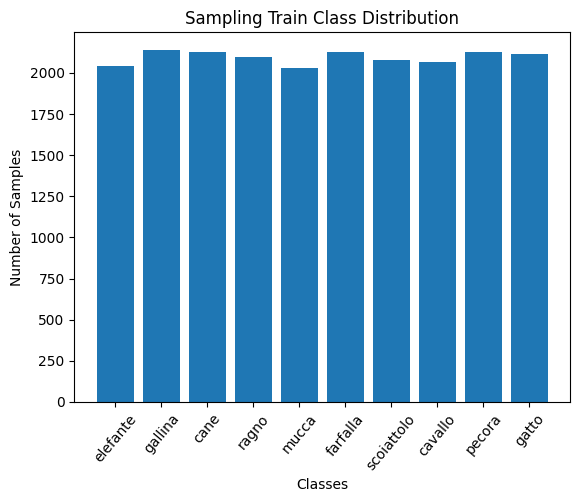

In [13]:
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=50)
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Sampling Train Class Distribution')
plt.show()

# Construct The Model
Here, we define the model architecture to fit by the dataset.

In [14]:
import time
import copy
import torch.nn as nn
import torch.optim as optim

def get_device():
  if torch.cuda.is_available():
    return torch.device("cuda:0")
  else:
    return torch.device("cpu")

device = get_device()

def train_model(model, dataloaders, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    train_logs = {
        'loss': [],
        'acc': []
    }
    val_logs = {
        'loss': [],
        'acc': []
    }

    for epoch in range(num_epochs):
        epoch_start = time.time()
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                if (scheduler != None):
                  scheduler.step()

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.float() / len(dataloaders[phase].dataset)

            if phase == 'train':
                train_logs['loss'].append(epoch_loss)
                train_logs['acc'].append(epoch_acc)
            else:
                val_logs['loss'].append(epoch_loss)
                val_logs['acc'].append(epoch_acc)

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        epoch_time_elapsed = time.time() - epoch_start
        print(f'Epoch time elapsed: {epoch_time_elapsed // 60:.0f}m {epoch_time_elapsed % 60:.0f}s')

        print()


    metrics_logs = {}
    metrics_logs['train'] = train_logs
    metrics_logs['val'] = val_logs
    total_time_elapsed = time.time() - since
    print(f'Training complete in {total_time_elapsed // 60:.0f}m {total_time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    model.load_state_dict(best_model_wts)
    return model, metrics_logs

In [15]:
import torch.nn as nn
import torch.nn.functional as F

class AnimalModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(256, 756, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(756 * 4 * 4, 756)
        self.fc2 = nn.Linear(756, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv4(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv5(x))
        x = F.max_pool2d(x, 2)
        x = x.view(-1, 756 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

model = AnimalModel()

print(model)

AnimalModel(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(256, 756, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=12096, out_features=756, bias=True)
  (fc2): Linear(in_features=756, out_features=10, bias=True)
)


In [16]:
print(device)

cuda:0


# Training The Model

From the constructed model here we train the model using several learning rate to determine best model accuracy.

In [17]:
learning_rates = [0.001, 0.0001, 0.00001]
train_activities = []

dataloaders = {
    'train': train_dl,
    'val': val_dl
}

for lr in learning_rates:
  model = AnimalModel().to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=lr)

  #Train
  print(f"Learning rate {lr}")
  trained_model, logs = train_model(model, dataloaders, criterion, optimizer, None, num_epochs=25)
  print()
  train_activities.append({
      'model': trained_model,
      'metric': logs
  })

Learning rate 0.001
Epoch 0/24
----------
train Loss: 2.1365 Acc: 0.2073
val Loss: 1.9820 Acc: 0.2885
Epoch time elapsed: 1m 32s

Epoch 1/24
----------
train Loss: 1.8428 Acc: 0.3493
val Loss: 1.7688 Acc: 0.3720
Epoch time elapsed: 1m 22s

Epoch 2/24
----------
train Loss: 1.6732 Acc: 0.4142
val Loss: 1.6257 Acc: 0.4314
Epoch time elapsed: 1m 25s

Epoch 3/24
----------
train Loss: 1.5268 Acc: 0.4661
val Loss: 1.5094 Acc: 0.4629
Epoch time elapsed: 1m 23s

Epoch 4/24
----------
train Loss: 1.4181 Acc: 0.5095
val Loss: 1.4362 Acc: 0.4912
Epoch time elapsed: 1m 26s

Epoch 5/24
----------
train Loss: 1.3385 Acc: 0.5382
val Loss: 1.3819 Acc: 0.5152
Epoch time elapsed: 1m 24s

Epoch 6/24
----------
train Loss: 1.2668 Acc: 0.5628
val Loss: 1.3845 Acc: 0.5159
Epoch time elapsed: 1m 25s

Epoch 7/24
----------
train Loss: 1.2136 Acc: 0.5833
val Loss: 1.2057 Acc: 0.5775
Epoch time elapsed: 1m 24s

Epoch 8/24
----------
train Loss: 1.1670 Acc: 0.5958
val Loss: 1.1353 Acc: 0.6129
Epoch time elapsed

# Loss and Accuracy



In [19]:
for activity in train_activities:
  val_accuracy = [acc.cpu().numpy() for acc in activity['metric']['val']['acc']]
  val_accuracy.sort()
  print(f"lr={learning_rates[train_activities.index(activity)]}, val: {val_accuracy[-1]:4f}")

lr=0.001, val: 0.689840
lr=0.0001, val: 0.632289
lr=1e-05, val: 0.424752


#lr=0.001 perfoms the best

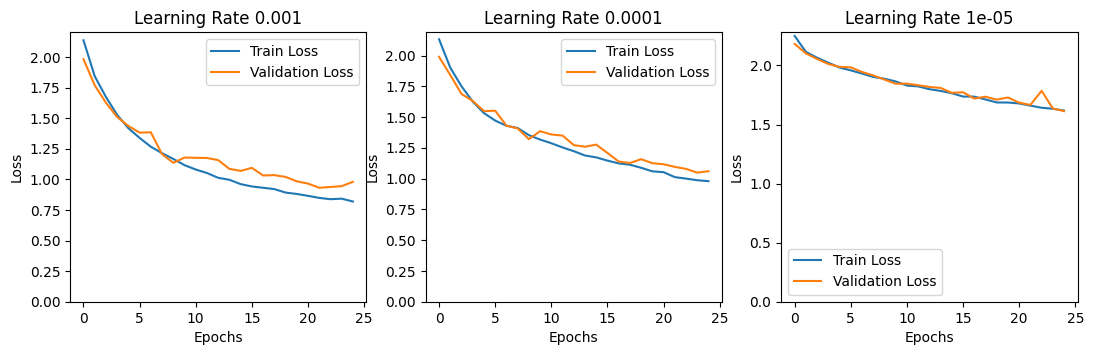

In [28]:
fig = plt.figure(figsize=(13, 3.5))

for activity in train_activities:
  fig.add_subplot(1, 3, train_activities.index(activity) + 1)
  plt.plot(activity['metric']['train']['loss'], label='Train Loss')
  plt.plot(activity['metric']['val']['loss'], label='Validation Loss')
  plt.title(f'Learning Rate {learning_rates[train_activities.index(activity)]}')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.ylim(0)
  plt.legend()

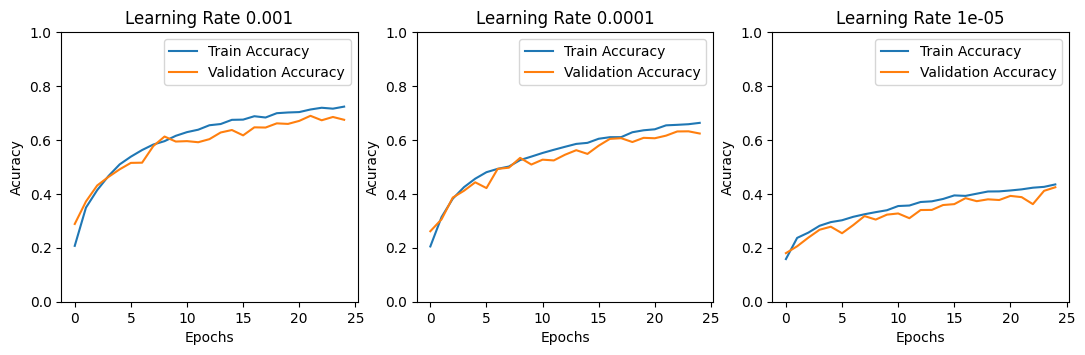

In [29]:
fig = plt.figure(figsize=(13, 3.5))

for activity in train_activities:
  train_accuracy = [acc.cpu().numpy() for acc in activity['metric']['train']['acc']]
  val_accuracy = [acc.cpu().numpy() for acc in activity['metric']['val']['acc']]

  fig.add_subplot(1, 3, train_activities.index(activity) + 1)
  plt.plot(train_accuracy, label='Train Accuracy')
  plt.plot(val_accuracy, label='Validation Accuracy')
  plt.title(f'Learning Rate {learning_rates[train_activities.index(activity)]}')
  plt.xlabel('Epochs')
  plt.ylabel('Acuracy')
  plt.ylim(0, 1)
  plt.legend()

plt.show()

# Confusion Matrix



In [31]:
best_val_acc = 0
best_model = None

for activity in train_activities:
  val_accuracy = [acc.cpu().numpy() for acc in activity['metric']['val']['acc']]
  val_accuracy.sort()
  if val_accuracy[-1] > best_val_acc:
    best_val_acc = val_accuracy[-1]
    best_model = activity['model']

print(f"Best validation accuracy: {best_val_acc:4f}")
print(best_model)

Best validation accuracy: 0.689840
AnimalModel(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(256, 756, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=12096, out_features=756, bias=True)
  (fc2): Linear(in_features=756, out_features=10, bias=True)
)


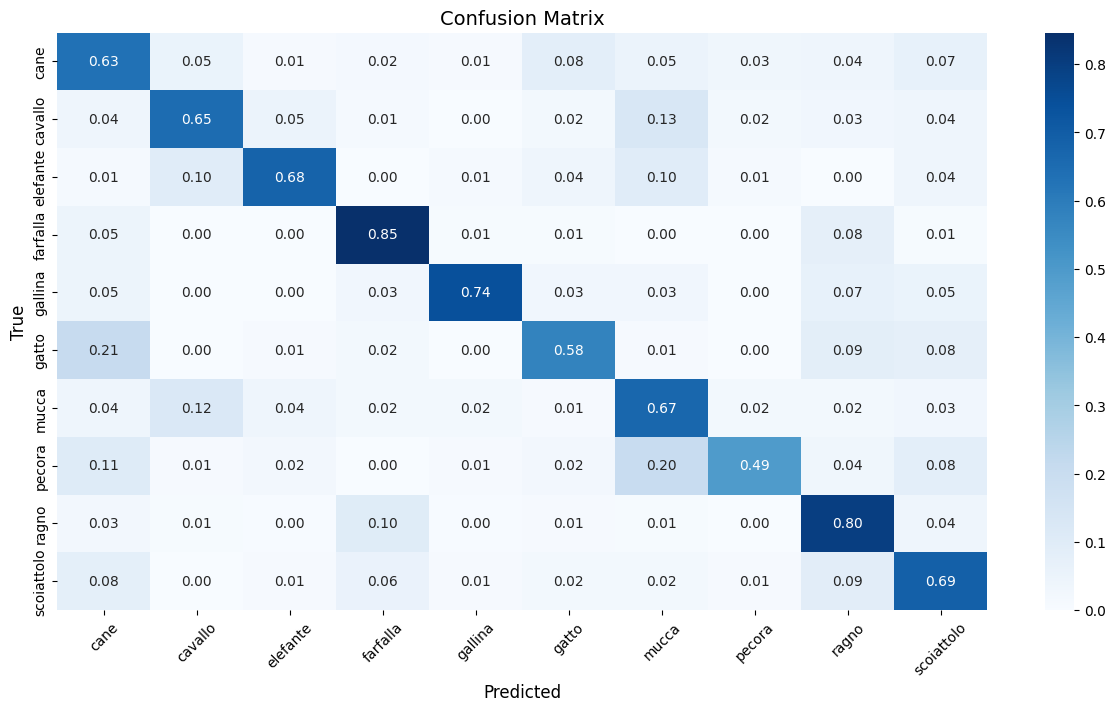

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = []
y_true = []

for inputs, labels in test_dl:
  inputs = inputs.to(device)
  labels = labels.to(device)

  outputs = best_model(inputs)
  _, preds = torch.max(outputs, 1)
  y_pred.extend(preds.cpu().numpy())
  y_true.extend(labels.cpu().numpy())

cm = confusion_matrix(y_true, y_pred)

cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(figsize=(15, 7.5))

sns.heatmap(cm, annot=True, fmt=".2f", ax=ax, cmap="Blues")

ax.set_xlabel('Predicted', fontsize=12)
ax.set_ylabel('True', fontsize=12)
ax.set_title('Confusion Matrix', fontsize=14)

ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)

plt.xticks(rotation=45)

plt.show()


# Pretrained Model
We use EfficientNet B0 for this classification problem.

In [42]:
import torchvision.models as models
import torch.nn as nn

def build_model(pretrained=True, fine_tune=True, num_classes=10):
    if pretrained:
        print('Loading pre-trained weights')
    else:
        print('Not loading pre-trained weights')
    model = models.efficientnet_b0(pretrained=pretrained)
    if fine_tune:
        print('Fine-tuning all layers...')
        for params in model.parameters():
            params.requires_grad = True
    elif not fine_tune:
        print('Freezing hidden layers...')
        for params in model.parameters():
            params.requires_grad = False

    model.classifier[1] = nn.Linear(in_features=1280, out_features=num_classes)
    return model

In [43]:
model = build_model(
    pretrained=True,
    fine_tune=True,
    num_classes=len(class_names)
).to(device)

print(model)

Loading pre-trained weights


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 76.1MB/s]


Fine-tuning all layers...
EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
      

# Training Model


In [44]:
learning_rate = 0.001

batch_size = 24
train_dl = DataLoader(train_dataset, batch_size=batch_size, sampler=ImbalancedDatasetSampler(train_dataset, labels=[label for _, label in train_dataset]))
val_dl = DataLoader(val_dataset, batch_size=batch_size)
test_dl = DataLoader(test_dataset, batch_size=batch_size)

dataloaders = {
    'train': train_dl,
    'val': val_dl
}

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

trained_model, logs = train_model(model, dataloaders, criterion, optimizer, None, num_epochs=14)

Epoch 0/13
----------
train Loss: 0.7192 Acc: 0.7667
val Loss: 0.5505 Acc: 0.8238
Epoch time elapsed: 1m 58s

Epoch 1/13
----------
train Loss: 0.5257 Acc: 0.8280
val Loss: 0.4805 Acc: 0.8462
Epoch time elapsed: 1m 58s

Epoch 2/13
----------
train Loss: 0.4774 Acc: 0.8430
val Loss: 0.4502 Acc: 0.8533
Epoch time elapsed: 1m 57s

Epoch 3/13
----------
train Loss: 0.4553 Acc: 0.8493
val Loss: 0.4239 Acc: 0.8556
Epoch time elapsed: 2m 0s

Epoch 4/13
----------
train Loss: 0.4212 Acc: 0.8608
val Loss: 0.4494 Acc: 0.8625
Epoch time elapsed: 1m 54s

Epoch 5/13
----------
train Loss: 0.4075 Acc: 0.8648
val Loss: 0.3936 Acc: 0.8729
Epoch time elapsed: 1m 59s

Epoch 6/13
----------
train Loss: 0.4025 Acc: 0.8672
val Loss: 0.3858 Acc: 0.8650
Epoch time elapsed: 1m 54s

Epoch 7/13
----------
train Loss: 0.3879 Acc: 0.8753
val Loss: 0.3789 Acc: 0.8762
Epoch time elapsed: 1m 54s

Epoch 8/13
----------
train Loss: 0.3678 Acc: 0.8781
val Loss: 0.3810 Acc: 0.8755
Epoch time elapsed: 1m 52s

Epoch 9/13


# Visualiszing Loss and Accuracy

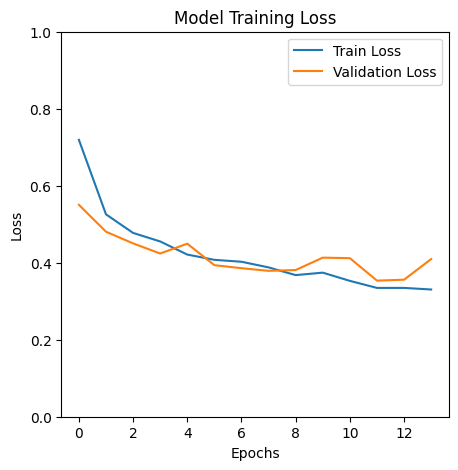

In [45]:
fig = plt.figure(figsize=(5, 5))

plt.plot(logs['train']['loss'], label='Train Loss')
plt.plot(logs['val']['loss'], label='Validation Loss')
plt.title(f'Model Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 1)
plt.legend()

plt.show()

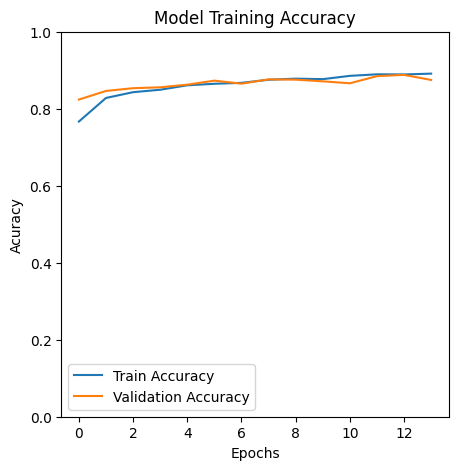

In [46]:
fig = plt.figure(figsize=(5, 5))

train_accuracy = [acc.cpu().numpy() for acc in logs['train']['acc']]
val_accuracy = [acc.cpu().numpy() for acc in logs['val']['acc']]

plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title(f'Model Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acuracy')
plt.ylim(0, 1)
plt.legend()

plt.show()

# Visualizing Confusion Matrix
Show prediction result from transfer learning model.

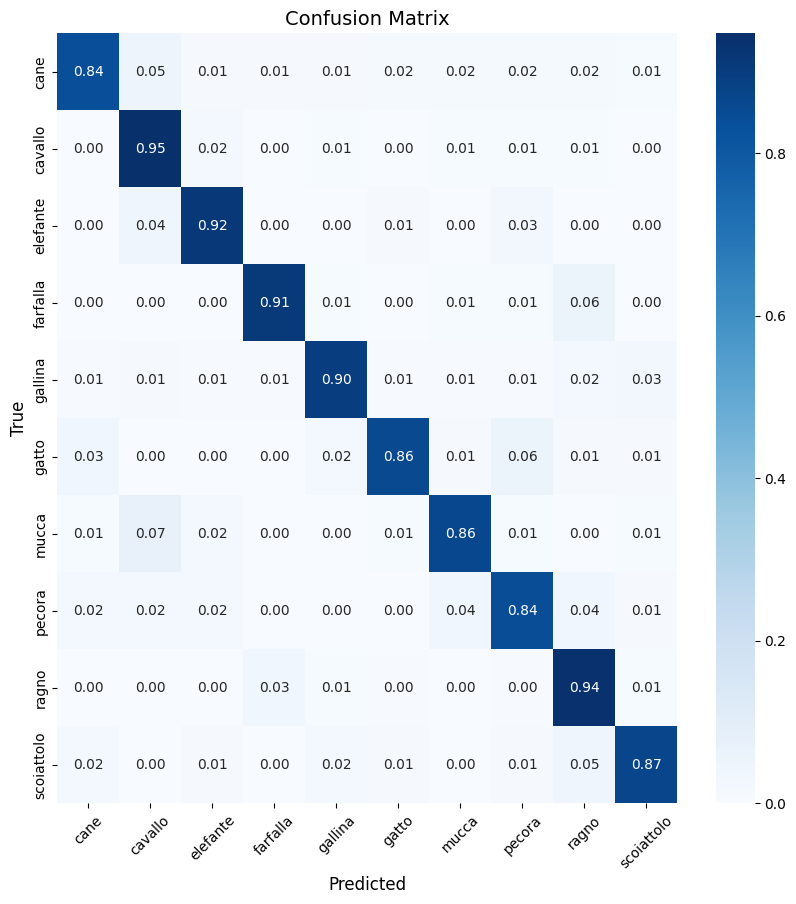

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = []
y_true = []

for inputs, labels in test_dl:
  inputs = inputs.to(device)
  labels = labels.to(device)

  outputs = trained_model(inputs)
  _, preds = torch.max(outputs, 1)
  y_pred.extend(preds.cpu().numpy())
  y_true.extend(labels.cpu().numpy())

cm = confusion_matrix(y_true, y_pred)

cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(cm, annot=True, fmt=".2f", ax=ax, cmap="Blues")

ax.set_xlabel('Predicted', fontsize=12)
ax.set_ylabel('True', fontsize=12)
ax.set_title('Confusion Matrix', fontsize=14)

ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)

plt.xticks(rotation=45)

plt.show()

In [48]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 9.7 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Cloning into 'detectron2'...
remote: Enumerating objects: 15837, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 15837 (delta 30), reused 12 (delta 12), pack-reused 15781 (from 2)
Receiving objects: 100% (15837/15837), 6.40 MiB | 9.96 MiB/s, done.
Resolving deltas: 100% (11537/11537), done.
Ignoring dataclasses: markers 'python_version < "3.7"' don't match your en

In [49]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0
torch:  2.6 ; cuda:  cu124
detectron2: 0.6


In [50]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# Run a pre-trained detectron2 model

In [51]:
from google.colab import files
uploaded = files.upload()

Saving photo_2025-04-08_15-37-57.jpg to photo_2025-04-08_15-37-57.jpg
Saving photo_2025-04-08_15-37-54.jpg to photo_2025-04-08_15-37-54.jpg
Saving photo_2025-04-08_15-37-51.jpg to photo_2025-04-08_15-37-51.jpg
Saving photo_2025-04-08_15-37-48.jpg to photo_2025-04-08_15-37-48.jpg
Saving photo_2025-04-08_15-37-44.jpg to photo_2025-04-08_15-37-44.jpg
Saving photo_2025-04-08_15-37-40.jpg to photo_2025-04-08_15-37-40.jpg
Saving photo_2025-04-08_15-37-10.jpg to photo_2025-04-08_15-37-10.jpg
Saving photo_2025-04-08_14-22-36.jpg to photo_2025-04-08_14-22-36.jpg


In [52]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5

cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.DEVICE = "cpu"
predictor = DefaultPredictor(cfg)

[04/09 20:01:12 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


model_final_f10217.pkl: 178MB [00:00, 206MB/s]                           
/usr/local/lib/python3.11/dist-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


# Description and conclusions in pdf

In [56]:
def process_images_with_model(image_paths, predictor, cfg, save_results=True, show_plots=True):
    import cv2
    import matplotlib.pyplot as plt
    from detectron2.utils.visualizer import Visualizer
    from detectron2.data import MetadataCatalog

    metadata = MetadataCatalog.get(cfg.DATASETS.TRAIN[0])
    class_names = metadata.thing_classes
    results = {}

    for image_path in image_paths:
        im = cv2.imread(image_path)
        if im is None:
            print(f"Err on {image_path}")
            continue

        outputs = predictor(im)
        classes = outputs["instances"].pred_classes.cpu().numpy()
        scores = outputs["instances"].scores.cpu().numpy()

        if len(classes) > 0:
            title_parts = []
            for i in range(len(classes)):
                animal = class_names[classes[i]]
                confidence = scores[i] * 100
                title_parts.append(f"{animal}: {confidence:.1f}%")

            title = f"Pred for  {image_path}\n" + " | ".join(title_parts)
        else:
            title = f"Err on {image_path}"

        v = Visualizer(im[:, :, ::-1],
                      metadata,
                      scale=1.2)
        out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
        result_image = out.get_image()[:, :, ::-1]

        if show_plots:
            plt.figure(figsize=(12, 8))
            plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
            plt.title(title)
            plt.axis('off')
            plt.show()

        if save_results:
            output_path = f"result_{image_path.split('/')[-1]}"
            cv2.imwrite(output_path, result_image)
            print(f"Saved {output_path}\n")

        results[image_path] = (outputs, result_image)

    return results

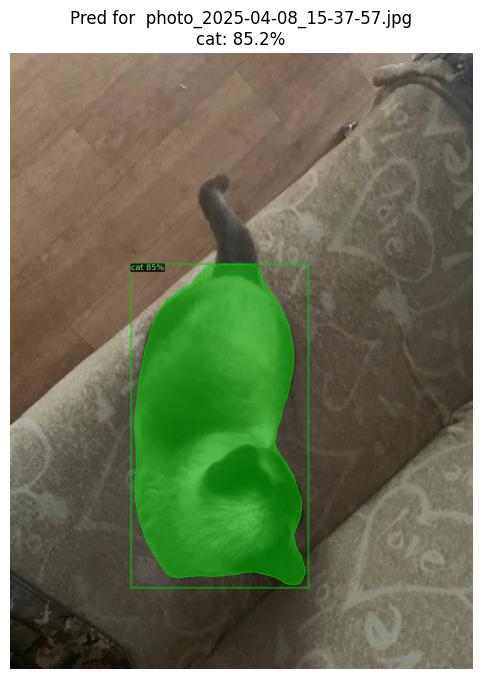

Saved result_photo_2025-04-08_15-37-57.jpg



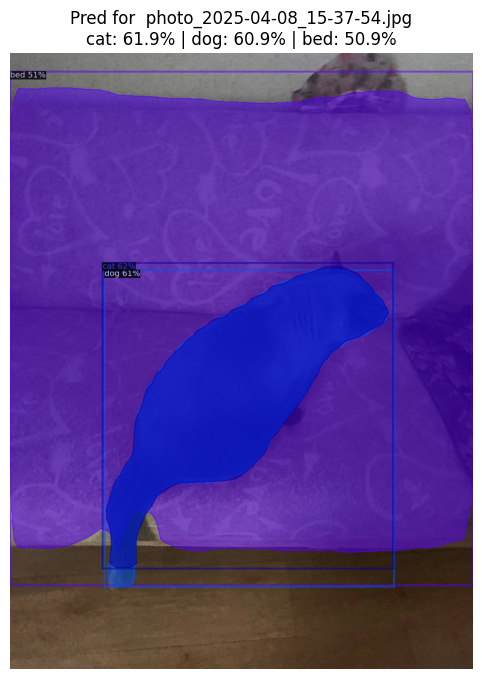

Saved result_photo_2025-04-08_15-37-54.jpg



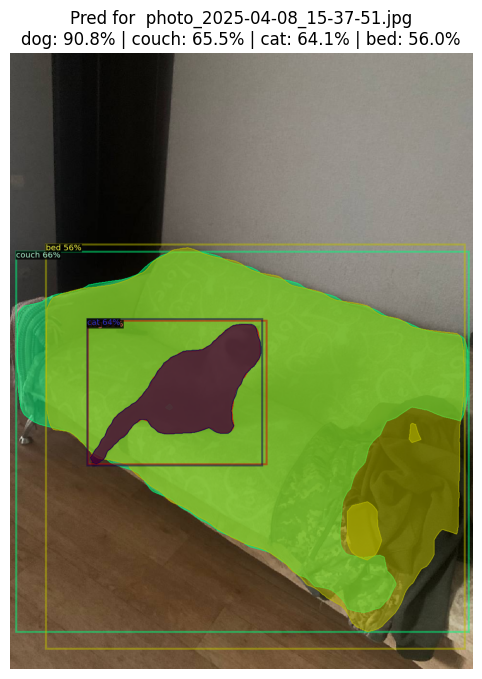

Saved result_photo_2025-04-08_15-37-51.jpg



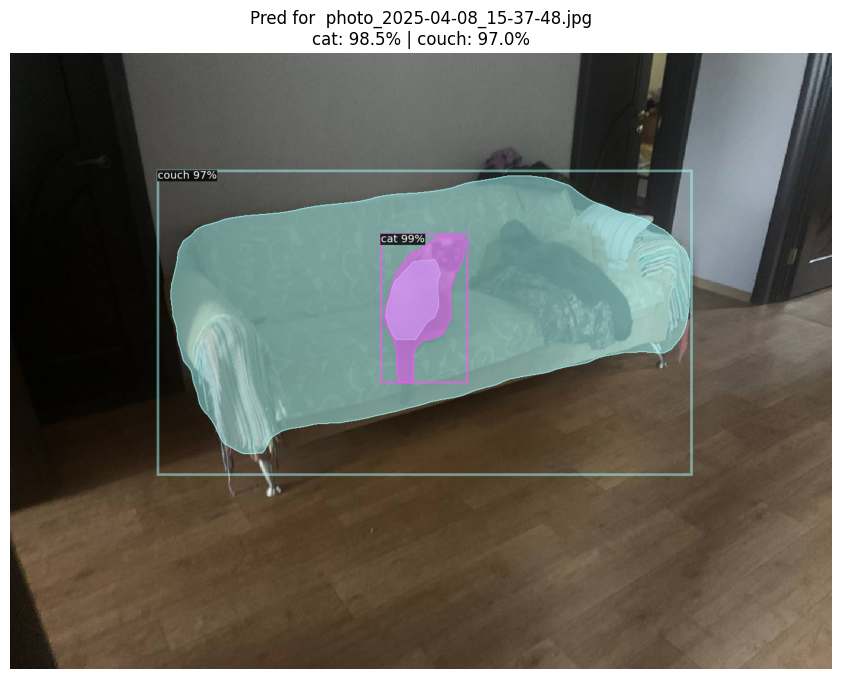

Saved result_photo_2025-04-08_15-37-48.jpg



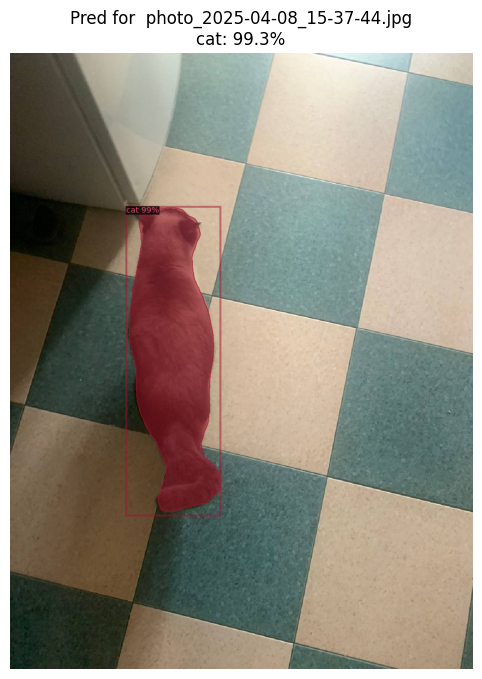

Saved result_photo_2025-04-08_15-37-44.jpg



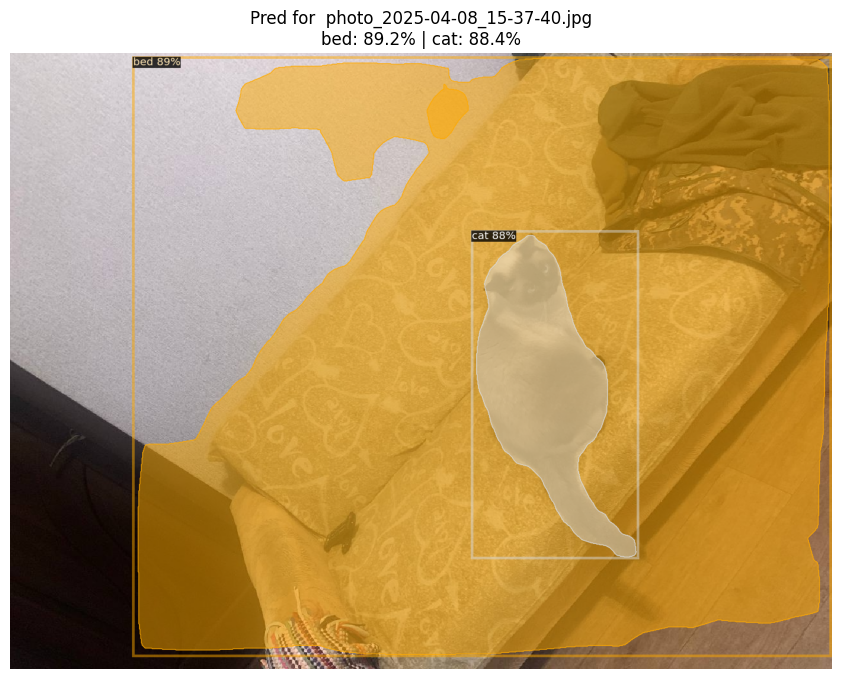

Saved result_photo_2025-04-08_15-37-40.jpg



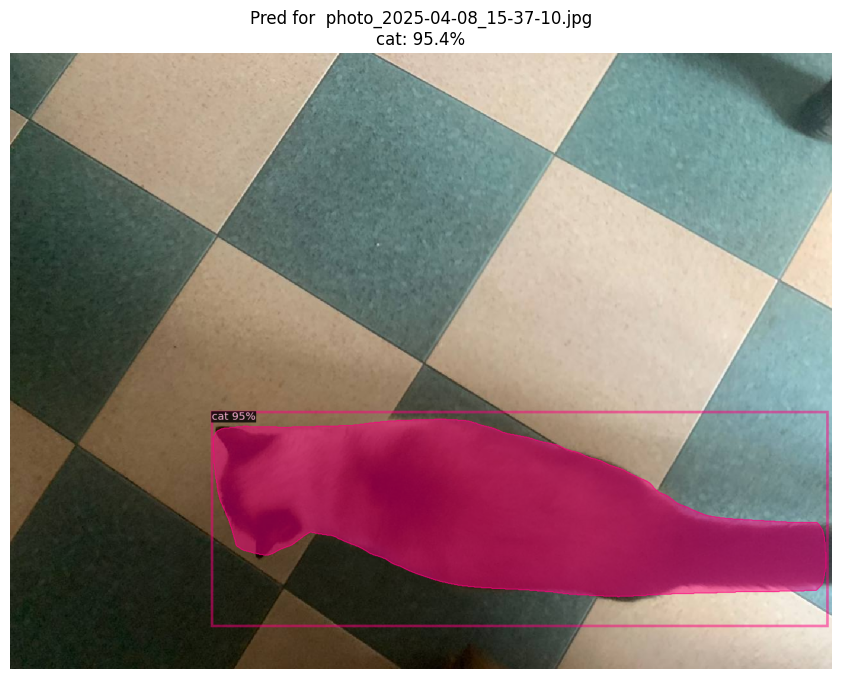

Saved result_photo_2025-04-08_15-37-10.jpg



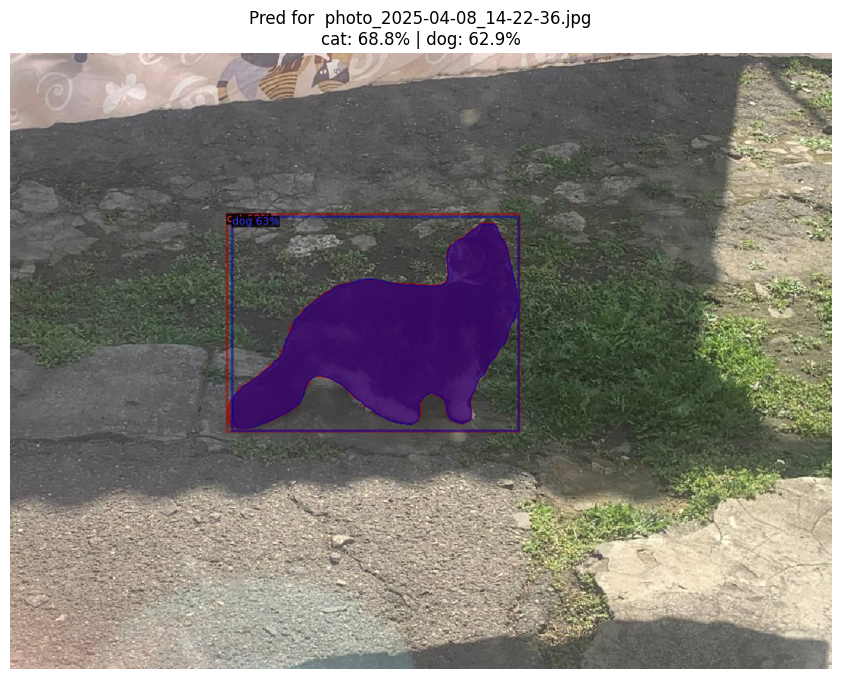

Saved result_photo_2025-04-08_14-22-36.jpg



In [57]:

image_paths = ["photo_2025-04-08_15-37-57.jpg", "photo_2025-04-08_15-37-54.jpg", "photo_2025-04-08_15-37-51.jpg", "photo_2025-04-08_15-37-48.jpg",
               "photo_2025-04-08_15-37-44.jpg", "photo_2025-04-08_15-37-40.jpg", "photo_2025-04-08_15-37-10.jpg",
               "photo_2025-04-08_14-22-36.jpg"]
results = process_images_with_model(image_paths, predictor, cfg, save_results=True, show_plots=True)


In [63]:
from google.colab import files
uploaded = files.upload()

Saving 4.jpg to 4.jpg
Saving 3.jpg to 3.jpg


#Here are some funny mistakes

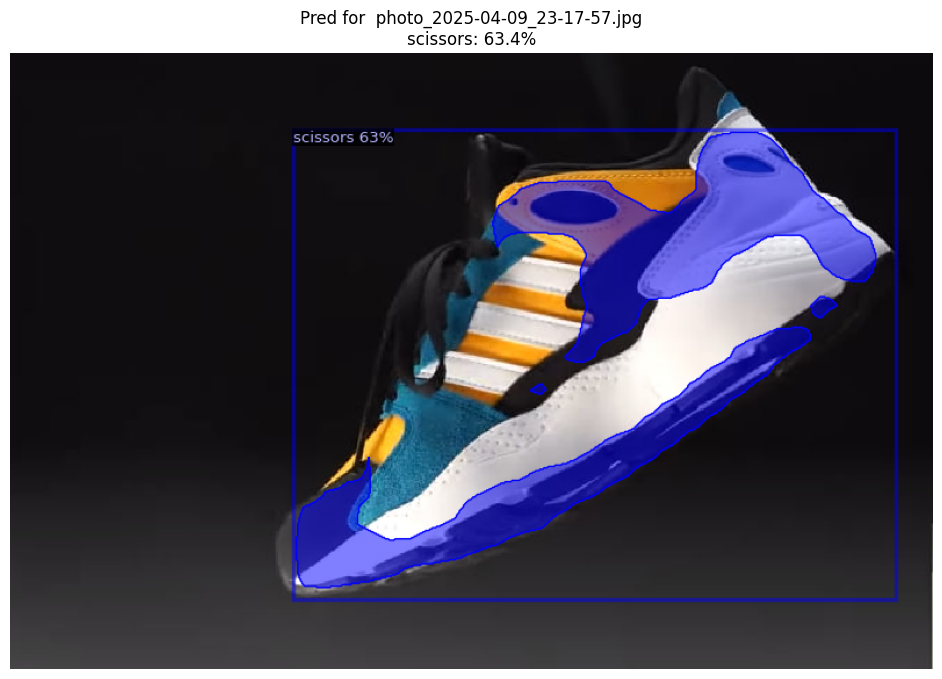

Saved result_photo_2025-04-09_23-17-57.jpg



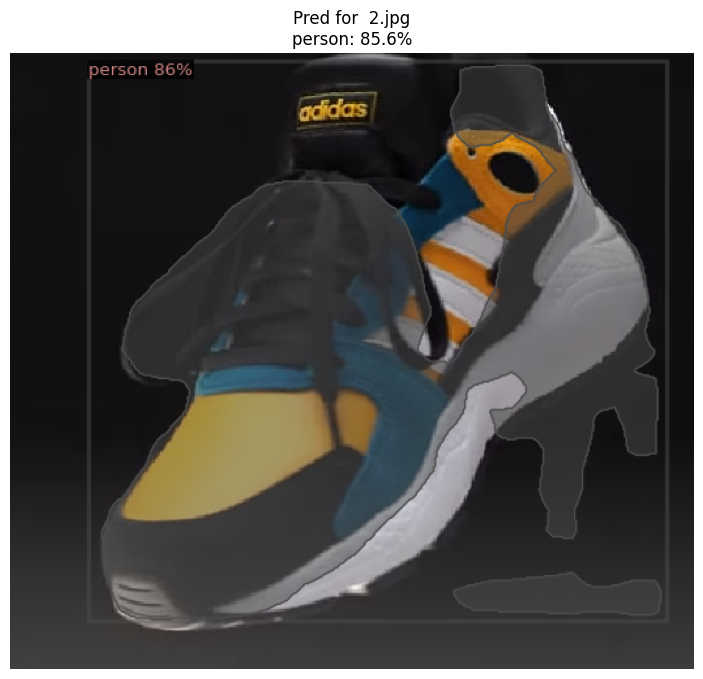

Saved result_2.jpg



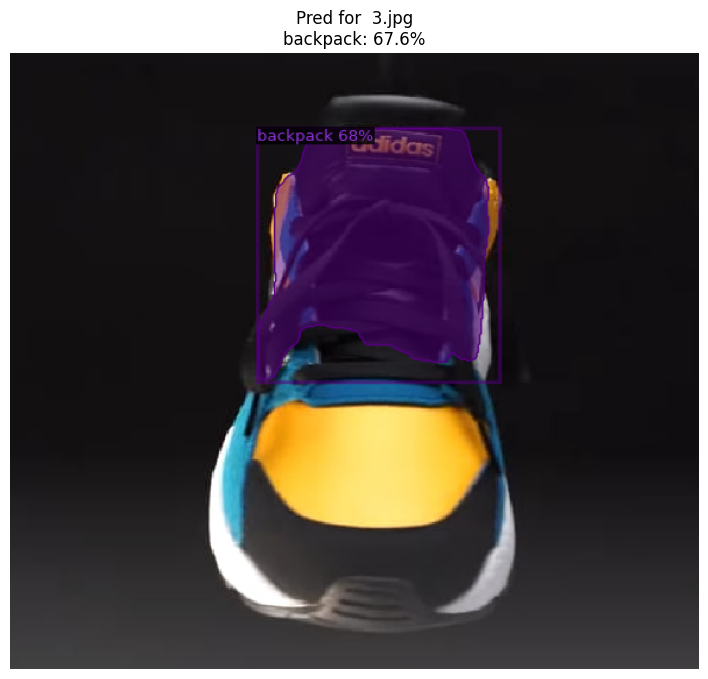

Saved result_3.jpg



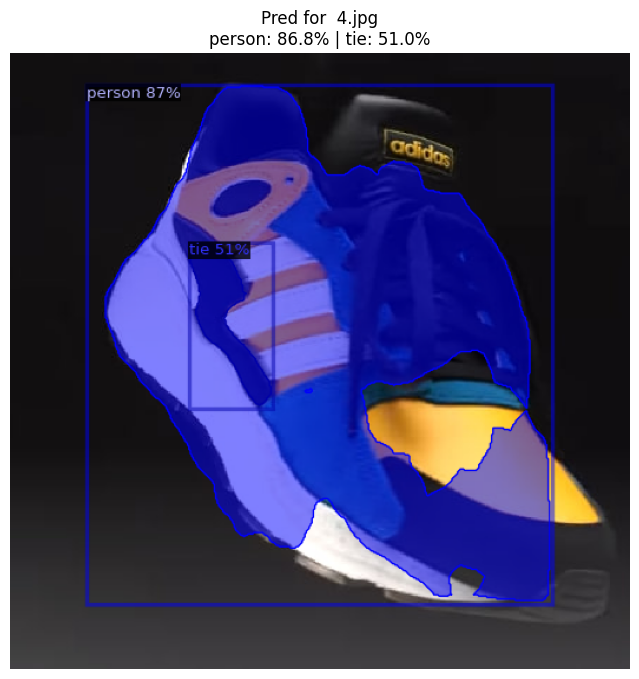

Saved result_4.jpg



In [64]:
image_paths = ["photo_2025-04-09_23-17-57.jpg", "2.jpg", "3.jpg", "4.jpg"]
results = process_images_with_model(image_paths, predictor, cfg, save_results=True, show_plots=True)